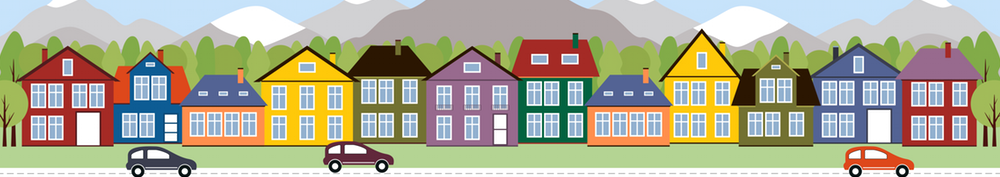


- Exploratory data analysis (EDA)
- Data pre-processing and feature engineering: scaling, imputation, encoding...
- A suite of regression models: linear regression, trees, forests, ...
- Hyperparamter tuning: CV, GridSearch...
- Model evaluation

Now it is time to deploy these skills in the real world, build your first "real" ML project, and see how you perform against other data scientists from all over the world!

We will join this active Kaggle competition to predict house prices:


https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [1]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [78]:
# Essentials
import numpy as np
import pandas as pd
import datetime
import random

# Plots
import seaborn as sns
import matplotlib.pyplot as plt

# Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV,LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
#import lightgbm as lgb
#from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# Stats
import scipy.stats as st
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Misc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA


In [3]:
# your code starts here:
train_raw = pd.read_csv('train.csv')
test_raw = pd.read_csv('test.csv')

train_raw.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


From the code below, we can see there are 1460 samples and 80 attributes plus SalePrice in train_raw dataset, among these 80 attributes 43 dtype is oject and 36 is numerical(excluding Id).

In [4]:
train_raw.shape

(1460, 81)

In [5]:
train_raw.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [6]:
cols_object = [col for col in train_raw.columns if train_raw[col].dtype == 'object']
cols_object

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [7]:
cols_numeric = [col for col in train_raw.columns if train_raw[col].dtype != 'object']
unwanted_num = {'SalePrice', 'Id'}
cols_numeric = [ele for ele in cols_numeric if ele not in unwanted_num]
cols_numeric

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [8]:
features = cols_numeric + cols_object

## Exploratory Visualization

I try to plot some attributes vs. SalePrice to see the trend this attribute on the SalePrice.

/Users/lydialiu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


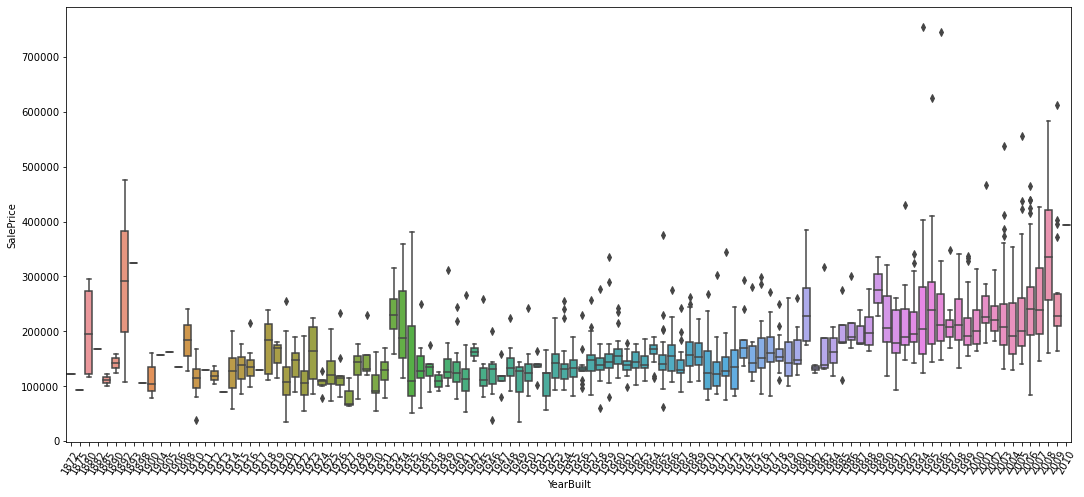

In [9]:
plt.figure(figsize=(18,8))
sns.boxplot(train_raw.YearBuilt, train_raw.SalePrice)
plt.xticks(rotation=60)
plt.show()

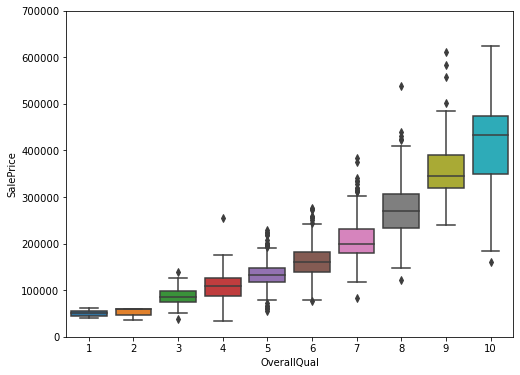

In [10]:
data = pd.concat([train_raw['SalePrice'], train_raw['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=train_raw['OverallQual'], y='SalePrice', data=data)
fig.axis(ymin=0, ymax=700000)
plt.show()

Visualize target SalePrice

/Users/lydialiu/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


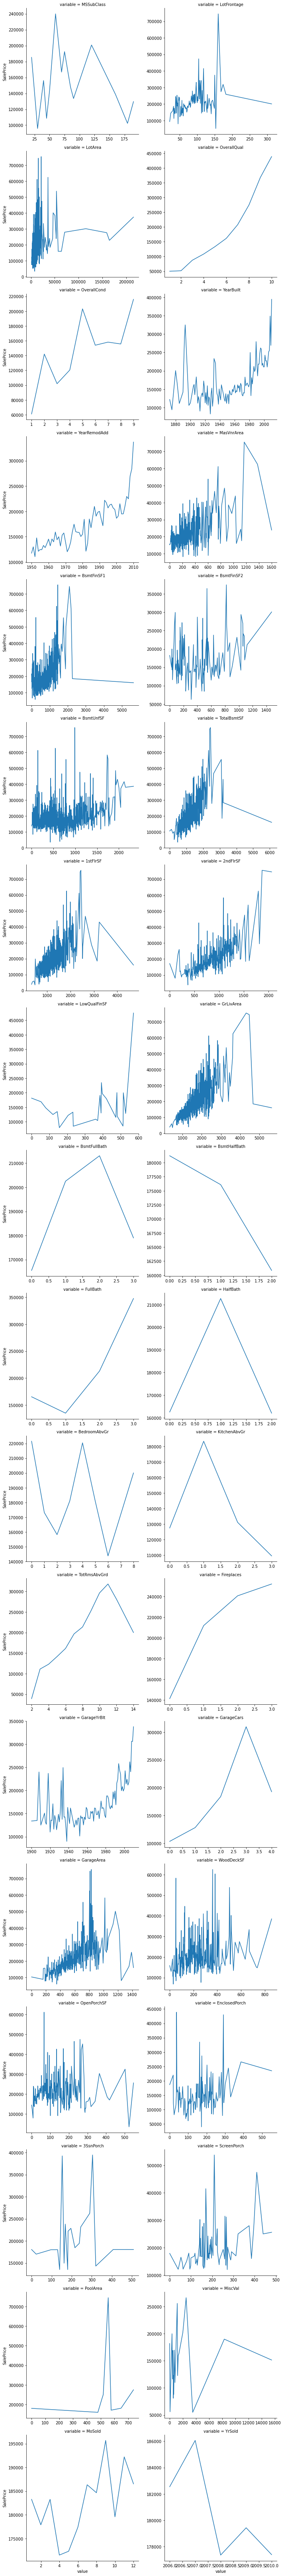

In [11]:
def Pairplot(x,y,**kwargs):
    ax = plt.gca()
    ts = pd.DataFrame({'time':x, 'val':y})
    ts = ts.groupby('time').mean()

    ts.plot(ax=ax)
#    plt.xticks(rotation=90)
    
f = pd.melt(train_raw, id_vars=['SalePrice'], value_vars = cols_numeric)
g = sns.FacetGrid(f, col='variable',col_wrap=2, sharex=False,
                sharey=False, size=5)
g = g.map(Pairplot, 'value','SalePrice')

False


we can see that none of the quantitative attributes are normal distributed so we need to do transformation before performing regression. And outliers exist, we will process these issues in the **Feature Engineering** section.

/Users/lydialiu/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


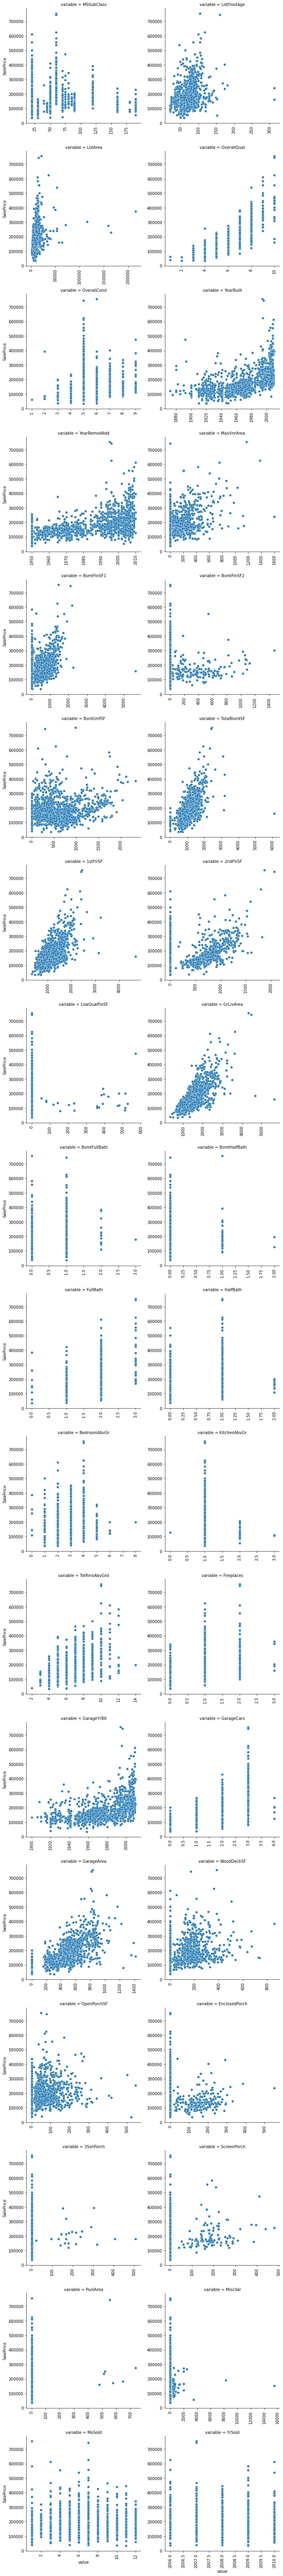

In [13]:
def Scatterplot(x,y, **kwargs):
    sns.scatterplot(x=x, y=y)
    x = plt.xticks(rotation=90)
f=pd.melt(train_raw, id_vars=['SalePrice'], value_vars=cols_numeric)
g = sns.FacetGrid(f, col='variable', col_wrap=2, sharex=False, sharey=False,
                 size=5)
g = g.map(Scatterplot, 'value','SalePrice')

There are outliers in some attributes, for example,LotFrontage, LotArea,MasVnrArea,BsmtFinSF1, BsmtFinSF2, TotalBsmtSF, 1stFlrSF, GrLivArea, MiscVal...
I will process the outliers in **Feature Engineering** section.

**Catagorical data Viulization**

Some categories seem to more diverse with repect to SalePrice than others. For example, Neighborhood has big impace on house price. A property with a pool tend to have much higher SalePrice. Most expensive seems to be Partial SaleCondition.  KitchenQual with excellent condition will have higher SalePrice. There are also differences in variabilities between category values.

/Users/lydialiu/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


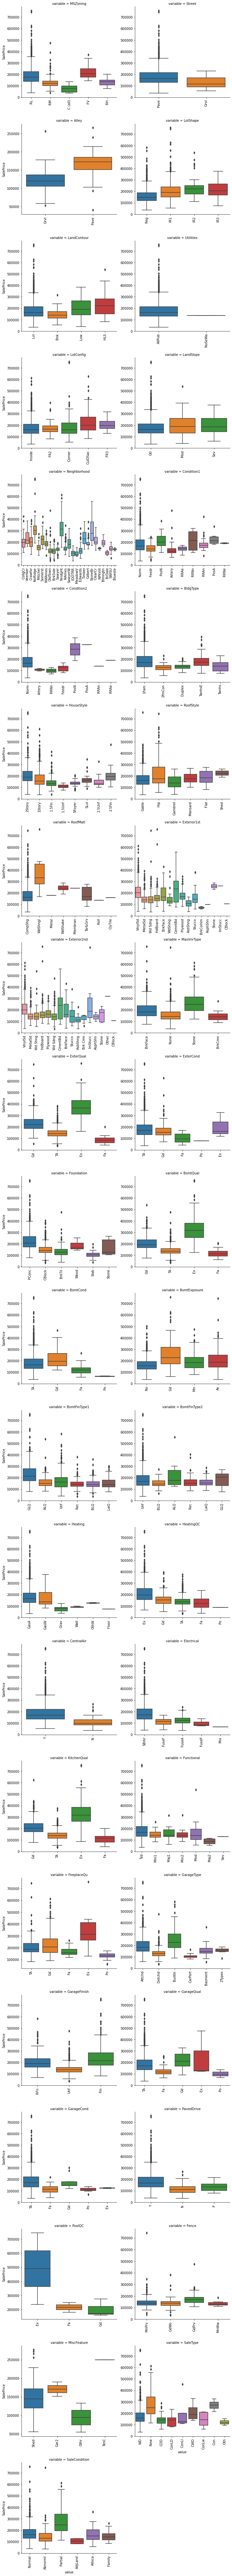

In [14]:
def Boxplot(x,y, **kwargs):
    sns.boxplot(x=x, y=y)
    x = plt.xticks(rotation=90)
f=pd.melt(train_raw, id_vars=['SalePrice'], value_vars=cols_object)
g = sns.FacetGrid(f, col='variable', col_wrap=2, sharex=False, sharey=False,
                 size=5)
g = g.map(Boxplot, 'value','SalePrice')

In [15]:
# def e_code(dframe, feature):
#     order = pd.DataFrame()
#     order['val'] = dframe[feature].unique()
#     order.index = order.val
#     order['spmean'] = dframe[[feature, 'SalePrice']].groupby(feature)\
#     .mean()['SalePrice']
#     order = order.sort_values('spmean')
#     order['order'] = range(1,order.shape[0]+1)
#     order = order['order'].to_dict()
    
#     for cat, o in order.items():
#         dframe.loc[dframe[feature] == cat, feature+'_E'] = o

# object_encoded =[]
# for q in cols_object:
#     e_code(train_raw, q)
#     e_code(test_raw, q)
#     object_encoded.append(q+'_E')
# print(object_encoded)

# features = object_encoded + cols_numeric

**Correlation**

<AxesSubplot:>

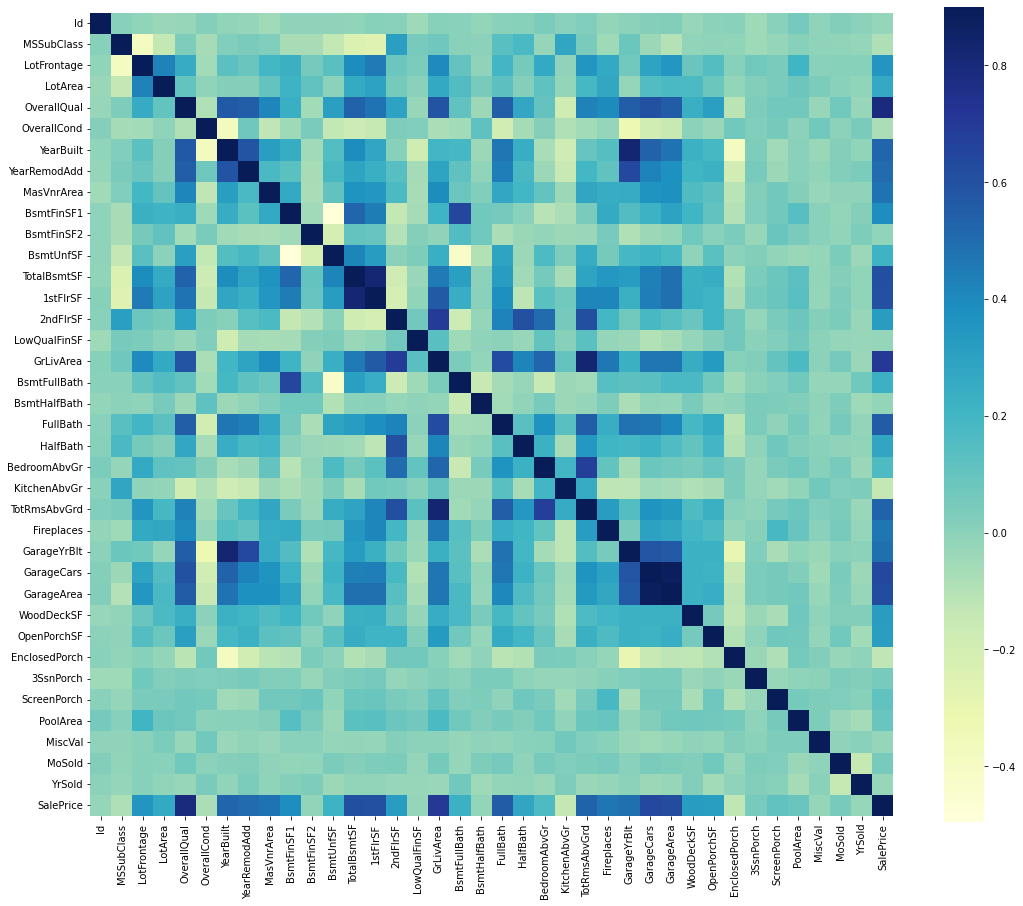

In [16]:
corr = train_raw.corr()
plt.subplots(figsize=(18,15))
sns.heatmap(corr, vmax=0.9, cmap='YlGnBu', square=True)

From the heatmap above, we can see many variables are strongly corrlated with each other. For example: 

- GarageCars vs. GarageArea, 
- GarageYrBlt vs. YearBuilt, 
- 1stFlrSF(First Floor square feet) vs. TotalBsmtSF(Total square feet of basement area)
- GrLivArea vs. TotRmsAbvGrd (Total rooms above grade (does not include bathrooms)
- Alley vs. Street_E, Utilities_E, MiscFeature_E, PoolQC_E,RoofMatl_E, Condition2_E
- PoolQC_E vs. MSZoning, Street, Alley_E, Utilies_E,LandSlope_E, Condition2_E, BldgType_E
- ...

I will process this issue to avoid multilinearity in the **Feature Engineering** section.

## Feature Engineering

**target: SalePrice**

Let's see the distribution of SalePrice.

/Users/lydialiu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


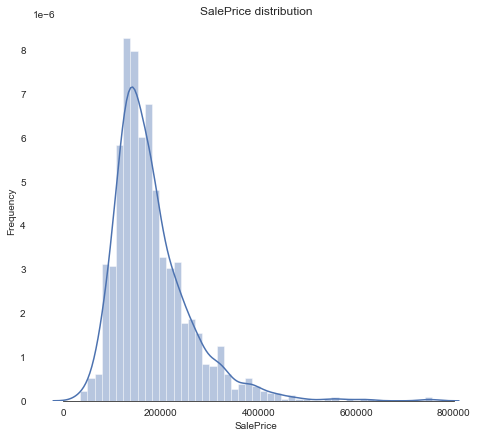

In [17]:
sns.set_style('white')
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8,7))

sns.distplot(train_raw['SalePrice'], color='b')
ax.xaxis.grid(False)
ax.set(ylabel='Frequency')
ax.set(xlabel='SalePrice')
ax.set(title='SalePrice distribution')
sns.despine(trim=True, left=True)
plt.show()

In [18]:
# check skewness
print('skew: %f'% train_raw['SalePrice'].skew())

skew: 1.882876


In [19]:
#log(1+x) transform
train_raw['SalePrice'] = np.log1p(train_raw['SalePrice'])

/Users/lydialiu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


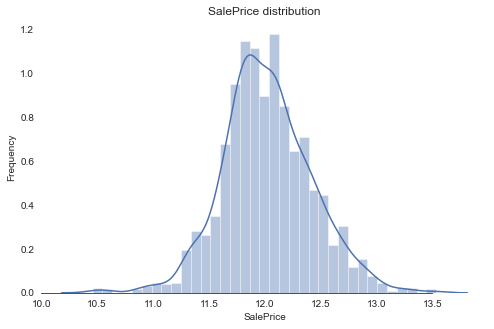


 mu = 12.02 and sigma = 0.40



In [20]:
sns.set_style('white')
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8,5))

sns.distplot(train_raw['SalePrice'], color='b')
ax.xaxis.grid(False)
ax.set(ylabel='Frequency')
ax.set(xlabel='SalePrice')
ax.set(title='SalePrice distribution')
sns.despine(trim=True, left=True)
plt.show()

(mu, sigma) = norm.fit(train_raw['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

Now target SalePrice is normally distributed.

visualize some more outliers in the data values 

### feature importance

Visualize some of features in the dataset

### Remove outliers

In [22]:
# remove outliers

train_raw.drop(train_raw[(train_raw['OverallQual']<5)& (train_raw['OverallQual']>200000)].index, inplace=True)
                         
train_raw.drop(train_raw[(train_raw['GrLivArea']>4500)& (train_raw['GrLivArea']<30000)].index, inplace= True)
                        


/Users/lydialiu/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


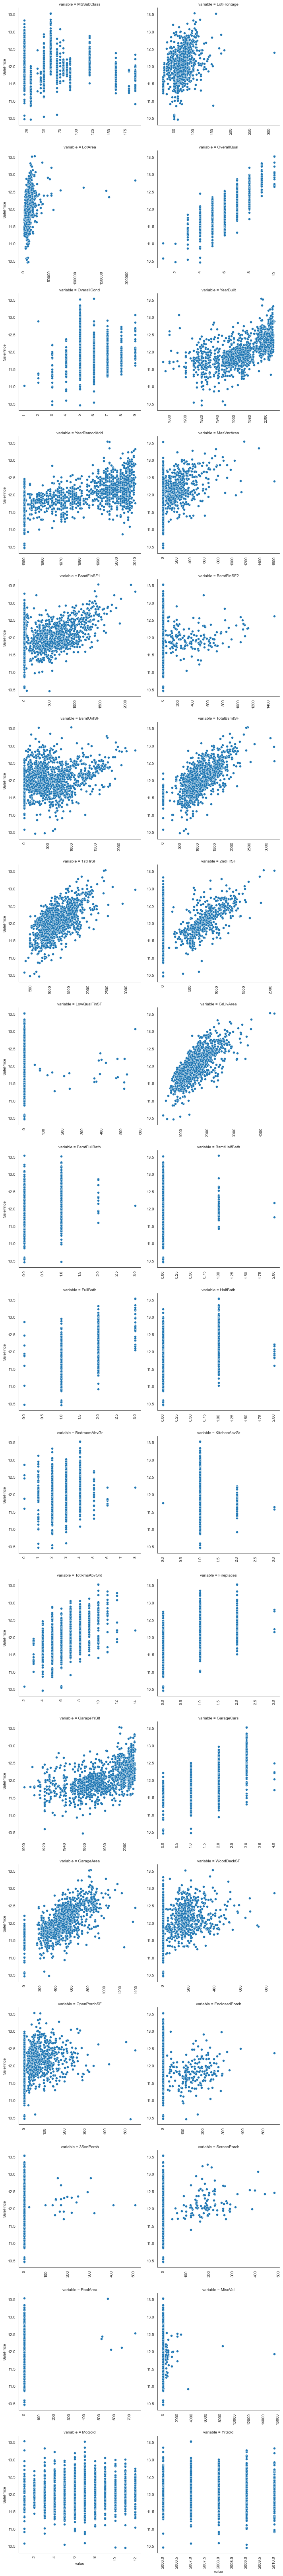

In [23]:
def Scatterplot(x,y, **kwargs):
    sns.scatterplot(x=x, y=y)
    x = plt.xticks(rotation=90)
f=pd.melt(train_raw, id_vars=['SalePrice'], value_vars=cols_numeric)
g = sns.FacetGrid(f, col='variable', col_wrap=2, sharex=False, sharey=False,
                 size=5)
g = g.map(Scatterplot, 'value','SalePrice')

In [24]:
X_train = train_raw[features]
y_train = train_raw['SalePrice'].reset_index(drop=True)

X_test = test_raw[features]

# Combine train and test features in order to apply the feature 
#transformation pipeline to the entire dataset
allsample= pd.concat([X_train, X_test]).reset_index(drop=True)
allsample.shape

(2917, 79)

In [59]:
len(X_train)

1458

In [60]:
len(X_test)

1459

In [25]:
allsample.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


### Missing Value

34 attributes have null


SaleType           1
Exterior1st        1
KitchenQual        1
GarageArea         1
GarageCars         1
Exterior2nd        1
Electrical         1
TotalBsmtSF        1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
BsmtHalfBath       2
Utilities          2
BsmtFullBath       2
Functional         2
MSZoning           4
MasVnrArea        23
MasVnrType        24
BsmtFinType1      79
BsmtFinType2      80
BsmtQual          81
BsmtCond          82
BsmtExposure      82
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageQual       159
GarageCond       159
LotFrontage      486
FireplaceQu     1420
Fence           2346
Alley           2719
MiscFeature     2812
PoolQC          2908
dtype: int64

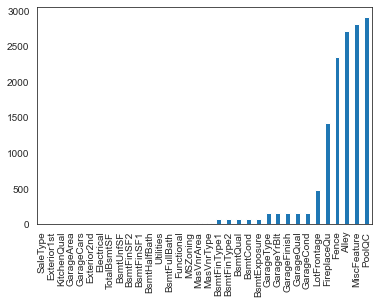

In [26]:

null = allsample[features].isnull().sum()
null = null[null>0]
print("{} attributes have null".format(null.shape[0]))
null.sort_values(inplace=True)
null.plot.bar()
null

### impute missing value

In [27]:
def process_missingval(dfsample):
    
    # some of the non-numeirc attributes are stored as numbers, convert them 
    # into strings
#     convert=('MSSubClass','YearBuilt','YrSold','MoSold','OverallQual','OverallCond',
#             'GarageYrBlt')
    convert=('MSSubClass','YrSold','MoSold')
    for col in convert:
         dfsample[col] = dfsample[col].astype(str)
    
    #replace missing value below with mode
    dfsample['MSZoning'] = dfsample.groupby('MSSubClass')['MSZoning']\
          .transform(lambda x:x.fillna(x.mode()[0]))
    
    mis_na_mode = ('SaleType','Exterior1st','KitchenQual', 'Exterior2nd',
                  'Electrical','Functional','Utilities','MasVnrType',
                'MasVnrType','BsmtFullBath','BsmtHalfBath')   
    for col in mis_na_mode:
        dfsample[col]= dfsample[col].fillna(dfsample[col].mode()[0])

    # based on data description, replace NA for values below with None  
    # also for the object type, set the NA as None

    mis_na_obj = ('PoolQC','GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','Alley','Fence',
               'FireplaceQu','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
             )
    for col in mis_na_obj:
        dfsample[col] = dfsample[col].fillna('None')
    
    # fill numeric missing values with 0
    mis_na_num = ('MasVnrArea','GarageYrBlt', 'GarageArea', 'GarageCars','BsmtFinType2',
                 'TotalBsmtSF', 'BsmtUnfSF', 'BsmtFinSF1',"BsmtFinSF2")
    for col in mis_na_num:
        dfsample[col] = dfsample[col].fillna(0)
        
    # for LotFrontage, fill missing value by the median LotFrontage of neighborhood
    
    dfsample['LotFrontage'] = dfsample.groupby('Neighborhood')['LotFrontage'] \
                              .transform(lambda x: x.fillna(x.mean()))
    
   # drop attributes MiscFeature, 99% of its value are missing.

#    dfsample = dfsample.drop('MiscFeature', axis=1)
    
    return dfsample

In [28]:
allsample = process_missingval(allsample)

In [29]:
allsample = allsample.drop('MiscFeature', axis=1)

In [30]:
null = allsample.isnull().sum()
null = null[null>0]
print("{} attributes have null".format(null.shape[0]))


0 attributes have null


Now the dataset **allsample** gets rid of missing values.

In [31]:
object_col = [col for col in allsample.columns if allsample[col].dtype == 'object']


In [32]:
numeric_col = [col for col in allsample.columns if allsample[col].dtype != 'object']


In [33]:
allsample.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,SaleType,SaleCondition
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,None,Attchd,RFn,TA,TA,Y,None,None,WD,Normal
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,TA,Attchd,RFn,TA,TA,Y,None,None,WD,Normal
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,TA,Attchd,RFn,TA,TA,Y,None,None,WD,Normal
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,Gd,Detchd,Unf,TA,TA,Y,None,None,WD,Abnorml
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,TA,Attchd,RFn,TA,TA,Y,None,None,WD,Normal


**Fix the skew issue for the numeirc attributes**

In [43]:
import pandas as pd
      
skew_attributes = allsample[numeric_col].apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skew_attributes[skew_attributes>0.5]
skew_index = high_skew.index

for s in skew_index:
    allsample[s] = boxcox1p(allsample[s], boxcox_normmax(allsample[s]+1))


**Create more features**

In [57]:
allsample['haspool'] = allsample['PoolArea'].apply(lambda x: 1 if x >0 else 0)
allsample['hasfireplace'] = allsample['Fireplaces'].apply(lambda x: 1 if x>0 else 0)
allsample['atleast2floor'] = allsample['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
allsample['hasgarage'] = allsample['GarageArea'].apply(lambda x: 1 if x > 0 else 0)


In [56]:
allsample['total_construction_sf'] = allsample['1stFlrSF'] + allsample['2ndFlrSF'] + allsample['TotalBsmtSF']
allsample['total_sqr_footage'] = (allsample['BsmtFinSF1'] + allsample['BsmtFinSF2'] + \
                                 allsample['1stFlrSF'] + allsample['2ndFlrSF'])    
allsample['total_porchSF'] = allsample['WoodDeckSF']+allsample['OpenPorchSF'] \
                             + allsample['EnclosedPorch'] + allsample['3SsnPorch'] +allsample['ScreenPorch']
allsample['total_bathrooms'] = allsample['FullBath'] + 0.5*allsample['HalfBath'] +allsample['BsmtFullBath'] \
                             + 0.5*allsample['BsmtHalfBath']
allsample['total_quality'] = allsample['OverallQual'] + allsample['OverallCond'] 
allsample['YearsSinceRemodel'] = allsample['YrSold'].astype(int) - allsample['YearRemodAdd'].astype(int)

allsample =  allsample.drop(columns=['Utilities', 'Street', 'PoolQC'], axis=1)


In [58]:
final_allsample = pd.get_dummies(allsample).reset_index(drop=True)
final_allsample.shape

(2917, 329)

**Recreate train and test datasets**

In [91]:
train_X = final_allsample.iloc[:len(X_train), :]
test_X = final_allsample.iloc[len(X_train):,:]

train_X.shape, test_X.shape


((1458, 329), (1459, 329))

In [68]:
cols_n = [col for col in final_allsample.columns if final_allsample[col].dtype != 'object']
cols_n

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'HasWoodDeck',
 'HasOpenPorch',
 'haspool',
 'hasfireplace',
 'atleast2floor',
 'hasgarage',
 'total_construction_sf',
 'total_porchSF',
 'total_bathrooms',
 'total_quality',
 'YearsSinceRemodel',
 'MSSubClass_120',
 'MSSubClass_150',
 'MSSubClass_160',
 'MSSubClass_180',
 'MSSubClass_190',
 'MSSubClass_20',
 'MSSubClass_30',
 'MSSubClass_40',
 'MSSubClass_45',
 'MSSubClass_50',
 'MSSubClass_60',
 'MSSubClass_70',
 'MSSubClass_75',
 'MSSubClass_80',
 'MSSubClass_85',
 'MSSubClass_90',
 'MoSold_1

**Key features of the model training process:**

- Cross Validation: Using 10-fold cross-validation
- Models: On each run of cross-validation I fit 7 models (ridge, svr, gradient boosting, random forest, xgboost, lightgbm regressors)
- Stacking: In addition, I trained a meta StackingCVRegressor optimized using xgboost
- Blending: All models trained will overfit the training data to varying degrees. Therefore, to make final predictions, I blended their predictions together to get more robust predictions.

In [70]:
#setup CV folds
kf = KFold(n_splits =10, random_state=42, shuffle=True )

In [96]:
# def error metrics:
def rmsle(y, y_prediction):
    return np.sqrt(mean_squared_error(y,y_prediction))

def cv_rmse(model, X):
    rmse = np.sqrt(-cross_val_score(model, X, y_train, scoring = 'neg_mean_squared_error',cv=kf))
    return (rmse)

In [85]:
alpha_ridge = [9e-4, 7e-4, 5e-4, 3e-4, 1e-4, 1e-3, 5e-2, 1e-2, 0.1, 0.3, 1, 3, 5, 10, 15, 18, 20, 30]
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=alpha_ridge, cv = kf))

alpha_lasso = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
lasso = make_pipeline(RobustScaler(), LassoCV(alphas=alpha_lasso, cv = kf))

svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003))

rf = RandomForestRegressor(n_estimators = 1200,
                          max_depth=15,
                          min_samples_split=5,
                          min_samples_leaf = 5,
                          max_features = None,
                          oob_score = True,
                          random_state = 42)

gbr = GradientBoostingRegressor(n_estimators = 6000,
                                learning_rate = 0.01,
                                max_depth = 4,
                                max_features = 'sqrt',
                                min_samples_leaf=15,
                                min_samples_split = 10,                                
                                random_state= 42,
                                loss = 'huber'
)

xgboost = XGBRegressor(learning_rate=0.01,
                       n_estimators=6000,
                       max_depth=4,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:linear',
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=42
)

#stack all the models above

stack_models = StackingCVRegressor(regressors=(xgboost, gbr, rf, 
                                               svr,lasso,ridge),
                                  meta_regressor = xgboost,
                                  use_features_in_secondary=True)


**Train Models**

In [100]:
score = cv_rmse(lasso, train_X)
print("ridge: {:.4f} ({:.4f})".format(score.mean(), score.std()))


/Users/lydialiu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02327868710786074, tolerance: 0.018449593110313123
  model = cd_fast.enet_coordinate_descent_gram(
/Users/lydialiu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.020954724663734936, tolerance: 0.018949635196039448
  model = cd_fast.enet_coordinate_descent_gram(
/Users/lydialiu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.06704615277421944, tolerance: 0.018949635196039448
  model = cd_fast.enet_coordinate_descent_gram(
/Users/lydialiu/opt/anaconda3/lib

/Users/lydialiu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03481509311549402, tolerance: 0.018700858571673907
  model = cd_fast.enet_coordinate_descent_gram(
/Users/lydialiu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.020203652500885738, tolerance: 0.018880982715546505
  model = cd_fast.enet_coordinate_descent_gram(
/Users/lydialiu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02310595755220035, tolerance: 0.018650024185632653
  model = cd_fast.enet_coordinate_descent_gram(
/Users/lydialiu/opt/anaconda3/lib

ridge: 0.1067 (0.0159)


/Users/lydialiu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02717870545524903, tolerance: 0.018618419903860445
  model = cd_fast.enet_coordinate_descent_gram(


In [101]:
score = cv_rmse(lasso, train_X)
print('Lasso:{:.4f} ({:.4f})\n'.format(score.mean(),score.std()))


/Users/lydialiu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02327868710786074, tolerance: 0.018449593110313123
  model = cd_fast.enet_coordinate_descent_gram(
/Users/lydialiu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.020954724663734936, tolerance: 0.018949635196039448
  model = cd_fast.enet_coordinate_descent_gram(
/Users/lydialiu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.06704615277421944, tolerance: 0.018949635196039448
  model = cd_fast.enet_coordinate_descent_gram(
/Users/lydialiu/opt/anaconda3/lib

/Users/lydialiu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03481509311549402, tolerance: 0.018700858571673907
  model = cd_fast.enet_coordinate_descent_gram(
/Users/lydialiu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.020203652500885738, tolerance: 0.018880982715546505
  model = cd_fast.enet_coordinate_descent_gram(
/Users/lydialiu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02310595755220035, tolerance: 0.018650024185632653
  model = cd_fast.enet_coordinate_descent_gram(
/Users/lydialiu/opt/anaconda3/lib

Lasso:0.1067 (0.0159)



/Users/lydialiu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02717870545524903, tolerance: 0.018618419903860445
  model = cd_fast.enet_coordinate_descent_gram(


In [103]:
score = cv_rmse(svr, train_X)
print("SVR: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

SVR: 0.1081 (0.0177)



In [105]:
score = cv_rmse(gbr,train_X)
print("gbr: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

gbr: 0.1109 (0.0143)



In [106]:
score = cv_rmse(xgboost,train_X)
print("gbr: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

[23:36:46] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:37:16] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:37:45] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:38:17] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:38:50] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now d

In [108]:
print('START Fit')

print('stack_models')
stack = stack_models.fit(np.array(train_X), np.array(y_train))

print('Lasso')
lasso_model_full_data = lasso.fit(train_X, y_train)

print('Ridge')
ridge_model_full_data = ridge.fit(train_X, y_train)

print('Svr')
svr_model_full_data = svr.fit(train_X, y_train)

print('GradientBoosting')
gbr_model_full_data = gbr.fit(train_X, y_train)

print('xgboost')
xgb_model_full_data = xgboost.fit(train_X, y_train)

START Fit
stack_models
[23:55:01] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:55:26] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:55:51] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:56:10] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:56:36] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:2

/Users/lydialiu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.14808240509082893, tolerance: 0.015877619708999962
  model = cd_fast.enet_coordinate_descent_gram(
/Users/lydialiu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6780121505052463, tolerance: 0.015672249292281105
  model = cd_fast.enet_coordinate_descent_gram(
/Users/lydialiu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1334969378337867, tolerance: 0.016123818401074762
  model = cd_fast.enet_coordinate_descent_gram(
/Users/lydialiu/opt/anaconda3/lib/py

[23:59:29] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[00:00:01] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


/Users/lydialiu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.030409392555467818, tolerance: 0.020866375694064566
  model = cd_fast.enet_coordinate_descent_gram(
/Users/lydialiu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.05697335584758889, tolerance: 0.020866375694064566
  model = cd_fast.enet_coordinate_descent_gram(
/Users/lydialiu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.08994653183423118, tolerance: 0.020395184715549932
  model = cd_fast.enet_coordinate_descent_gram(


Lasso


/Users/lydialiu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.030409392555467818, tolerance: 0.020866375694064566
  model = cd_fast.enet_coordinate_descent_gram(
/Users/lydialiu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.05697335584758889, tolerance: 0.020866375694064566
  model = cd_fast.enet_coordinate_descent_gram(
/Users/lydialiu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.08994653183423118, tolerance: 0.020395184715549932
  model = cd_fast.enet_coordinate_descent_gram(


Ridge
Svr
GradientBoosting
xgboost
[00:01:24] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


**Blending Models**

In [115]:
def blend_models_predict(X):
    return ((0.15 * lasso_model_full_data.predict(X)) + 
            (0.1 * ridge_model_full_data.predict(X)) + 
            (0.15 * svr_model_full_data.predict(X)) + 
            (0.15 * gbr_model_full_data.predict(X)) + 
            (0.15 * xgb_model_full_data.predict(X)) +     
            (0.3 * stack_models.predict(np.array(X))))

In [116]:
print('RMSLE score on train data:')
print(rmsle(y_train, blend_models_predict(train_X)))

RMSLE score on train data:
0.08363329590704453
